# Ajuste de Curvas

Em geral, os dados são fornecidos em um conjunto discreto de valores entre um contínuo
de possibilidades. Entretanto, pode ser necessário fazer estimativas em pontos que estão
entre os valores discretos. Neste capitulo, descrevemos técnicas para ajustar curvas a tais
dados, com o objetivo de obter estimativas intermediárias.

Há duas abordagens gerais para o ajuste de curvas, as quais são distinguidas entre
si com base na quantidade de erro associada com os dados. Primeiro, quando os dados
exibirem um grau significativo de erro ou “ruído”, a estratégia será encontrar uma única
curva que represente a tendência geral dos dados. Como cada ponto individual pode
estar incorreto, não será feito nenhum esforço para passar a curva por todos os pontos.
Em vez disso, a curva é escolhida para seguir o padrão dos pontos considerados como
um grupo. Uma abordagem dessa natureza é chamada de **regressão por mínimos quadrados**.

Segundo, quando se souber que os dados são muito precisos, a abordagem básica
é ajustar uma curva ou uma série de curvas que passam diretamente por cada um dos
pontos. Tais dados usualmente se originam de tabelas. Exemplos são os valores da den-
sidade da água ou da capacidade térmica dos gases como função da temperatura. A es-
timativa de valores entre pontos discretos bem conhecidos é chamada **interpolação**. Vamos estudar esse assunto no proximo capitulo.


## Estatisticas Simples

Suponha que, no decorrer de um estudo em engenharia, tenham sido feitas diversas medidas de uma quantidade particular. Por exemplo, as leituras do coeficiente de expansão térmica de um aço estrutural. Tomados como valores de face, os dados fornecem uma quantidade limitada de informação — isto é, os valores variam entre um mínimo a um máximo.

Uma informação muito importante sobre os dados é a sua *media aritmetica* $(\bar y)$ que é definido como a soma dois pontos individualmente dados ($y_i$) dividida pelo numero de pontos ($n$), ou

$$
\bar y = \frac{\sum y_i}{n}
$$

onde a somatoria vai de $i=1$ ate $n$. 

A medida de dispersão mais comum para uma amostra é o *desvio-padrão* $(s_y)$ em
torno da média,

$$
s_y = \sqrt{\frac{S_t}{n-1}}
$$

onde $S_t$ é a soma total dos quadrados dos resíduos entre os pontos dados e a média, ou

$$
S_t = \sum(y_i - \bar y)^2
$$

Portanto, se as medidas individuais estiverem amplamente dispersas em torno da média, $S_t$ (e, consequentemente, $s_y$ ) será grande. Se elas estiverem bem agrupadas, o desvio-padrão será pequeno. A dispersão também pode ser representada pelo quadrado do
desvio-padrão, o qual é chamado de variância:

$$
s_y^2 = \frac{\sum(y_i - \bar y)^2}{n-1}
$$

Uma estatística final que tem utilidade na quantificação da dispersão dos dados é o *coeficiente de variação* (c.v.). Essa estatística é a razão do desvio-padrão pela média. Como tal, o c.v. fornece uma medida normalizada da dispersão. Ele é, em geral, multiplicado por 100, de modo que possa ser expresso como uma porcentagem:

$$
c.v. = \frac{s_y}{\bar y} 100\%
$$
Esse coeficiente é muito parecido com o erro relativo porcentual ($\varepsilon_t$) discutido anteriormente.

Vamos calcular a media e desvio-padrão para os dados abaixo 

In [2]:
import numpy as np

data = [6.395, 6.435, 6.485, 6.495, 6.505, 6.515, 6.555, 6.555,6.565, 
        6.575, 6.595, 6.605, 6.615, 6.625, 6.625, 6.635, 6.655, 6.655, 
        6.665, 6.685, 6.715, 6.715, 6.755, 6.775]

data = np.array(data)

In [2]:
n = len(data)

sums = data.sum()

media = sums/n

print(f"O numero de dados é n = {n} e a sua media é {np.round(media,3)}.")
print(media == data.mean())

O numero de dados é n = 24 e a sua media é 6.6.
True


In [3]:
S_t = sum((data - media)**2)
s_y = np.sqrt(S_t/(n-1))
print(f"O desvio-padrão é {s_y}")

O desvio-padrão é 0.09713280912593676


In [4]:
c_v = (s_y/media) * 100
print(f"o coeficiente de variação é {np.round(c_v, 2)}%")

o coeficiente de variação é 1.47%


## Distribuição Normal

Uma outra característica relacionada com a discussão presente é a distribuição de dados
— isto é, a forma como os dados estão dispersos em torno da média. Um histograma
fornece uma representação visual simples da distribuição.

Se tivéssemos um conjunto muito grande de dados, o histograma em geral poderia
ser aproximado por uma curva lisa. A curva simétrica, em forma de sino, superposta na
figura abaixo é uma de tais formas características — a distribuição normal.

<AxesSubplot:ylabel='Count'>

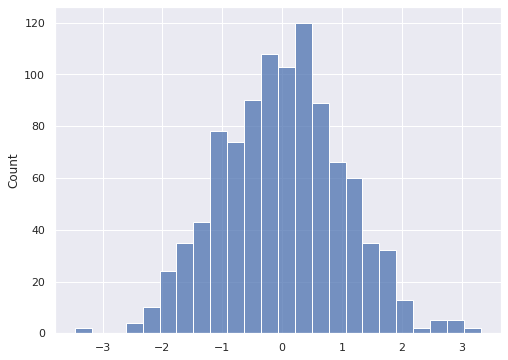

In [22]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
#sns.set_context("paper")
sns.set_theme(style="darkgrid")


x = np.random.randn(1000)
#px.histogram(x, nbins=80)
plt.figure(figsize=(8,6))
sns.histplot(x)

<Figure size 576x432 with 0 Axes>

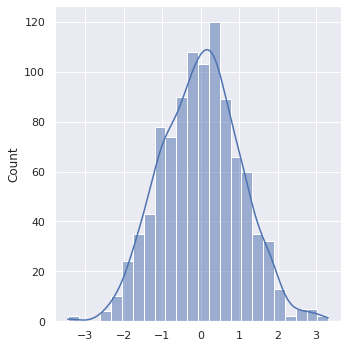

In [23]:
plt.figure(figsize=(8,6))
sns.displot(x, kde=True)
plt.show()

Com mais dados temos uma curva mais lisa ainda

<Figure size 576x432 with 0 Axes>

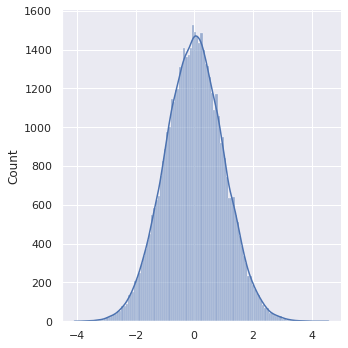

In [24]:
x = np.random.randn(50000)
#hist_data = [x]
#group_labels = ['distplot'] # name of the dataset
#fig = ff.create_distplot(hist_data, group_labels, bin_size=.1)
#fig.show()
plt.figure(figsize=(8,6))
sns.displot(x, kde=True)
plt.show()

Os conceitos de média, desvio-padrão, soma dos quadrados dos resíduos e distribuição normal têm todos grande relevância na prática da engenharia. Um exemplo muito simples é a sua utilização para determinar a *confiança* que pode ser associada a uma medida particular. Se uma quantidade for normalmente distribuída, o intervalo definido por $\bar y − s_y$ a $\bar y + s_y$ irá conter aproximadamente 68% do total das medidas. Analogamente, o intervalo definido por $\bar y − 2s_y$ a $\bar y + 2 s_y$ irá conter aproximadamente 95%.

Observe que, na discussão a seguir, os símbolos $\bar y$ e $s_y$ se referem à média e ao
desvio-padrão da amostra, respectivamente. Os símbolos $\mu$ e $\sigma$ se referem à média e ao
desvio-padrão da população, respectivamente.

Um intervalo estimador dá o intervalo de valores no qual é esperado que o
parâmetro esteja com uma dada probabilidade. Um intervalo bilateral pode ser descrito pela expressão

$$
P\{L \le \mu \le U\} = 1 - \alpha
$$

a qual é lida: “a probabilidade de que a média verdadeira de $y$, $\mu$, caia dentro dos limites
de $L$ a $U$ é $1 − \alpha$”. A quantidade α é chamada de nível de significância.

Se a variância verdadeira da distribuição de $y$, $\sigma^2$ , for conhecida (o que, em geral,
não é o caso), a teoria estatística afirma que a média da amostra $\bar y$ vem de uma distribuição normal com média \mu$$ e variância $\sigma^2 /n$. Na realidade não se conhece $\mu$. Portanto, não se sabe onde a curva normal está exatamente localizada em relação a $\bar y$. Para contornar esse dilema, calcula-se uma nova quantidade, a *estimativa normal padrão*

$$
\bar z = \frac{\bar y - \mu}{\sigma/\sqrt n}
$$

a qual representa a distância normalizada entre $\bar y$ e $\mu$. De acordo com a teoria estatística, essa quantidade deveria ser normalmente distribuída, com média 0 e variância 1.

Esses resultados podem ser reorganizados para fornecer

$$
L \le \mu \le U
$$

com probabilidade $1-\alpha$, onde

$$
L = \bar y - \frac{\sigma}{\sqrt n} z_{\alpha/2} , \;\;\;\;\; U = \bar y + \frac{\sigma}{\sqrt n} z_{\alpha/2}
$$

Agora, embora o precedente forneça uma estimativa para $L$ e para $U$, ela é baseada
no conhecimento da variância verdadeira σ. No nosso caso, conhecemos apenas a variância estimada $s_y$ . Uma alternativa simples seria deduzir uma versão no lugar de $\bar z$
baseada em $s_y$,

$$
t = \frac{\bar y - \mu}{s_y/\sqrt n}
$$

Mesmo quando são tomadas amostras de uma distribuição normal, essa fração não
será normalmente distribuída, particularmente quando n for pequeno. Foi descoberto por
W. S. Gossett que a variável aleatória definida chamada
*distribuição t de Student* ou, simplesmente, *distribuição $t$*. Nesse caso,

$$
L = \bar y - \frac{s_y}{\sqrt n} t_{\alpha/2, n-1} , \;\;\;\;\; U = \bar y + \frac{s_y}{\sqrt n} t_{\alpha/2, n-1}
$$
onde $t_{\alpha/2, n-1}$ é a variável aleatória padrão para a distribuição t para uma probabilidade de $\alpha/2$ e os valres são tabelados. Por exemplo, se $\alpha = 0,05$ e $n = 20$, $t_{\alpha/2, n-1}= 2,086$. Isso significa que um intervalo em torno da média de largura $\pm 2,086$ vez o desvio-padrão delimitará aproximadamente $95\%$ da distribuição.

A distribuição $t$ pode ser considerada como uma modificação da distribuição normal
que leva em conta o fato de se ter uma estimativa imperfeita do desvio-padrão. Quando $n$
for pequeno, ela tende a ser mais achatada do que a normal. Conforme $n$ se torna grande, a distribuição $t$ converge para a normal.

In [8]:
from scipy.stats import t, norm
import plotly.graph_objects as go

O valor de $t_{\alpha/2, n-1}$ para $\alpha = 0,05$ e $n = 20$ pode ser calculado usando a biblioteca `Scipy` 

In [9]:
t.isf(0.05/2, 20)

2.085963447265837

Uma comparação entre a distribuição normal e $t$.

In [10]:
df1 = 1
df2 = 4
df3 = 10
df4 = 50

x = np.linspace(-10, 10, 200)

fig = go.Figure()
fig.add_scatter(x=x, y=t.pdf(x, df1), name=f"df = {df1}")
fig.add_scatter(x=x, y=t.pdf(x, df2), name=f"df = {df2}")
fig.add_scatter(x=x, y=t.pdf(x, df3), name=f"df = {df3}")
fig.add_scatter(x=x, y=t.pdf(x, df4), name=f"df = {df4}")
fig.add_scatter(x=x, y=norm.pdf(x), name="normal dist")
fig.update_layout(title="Comparação de distribuição normal e t")


### **Exemplo:** 
Determine a média e o intervalo de confiança de $95\%$ para os dados ddo exemplo anterior. Faça três estimativas baseadas (a) nas primeiras 8, (b) nas primeiras 16 e (c) em todas as 24 medidas.

**Resolução:**

(a) A média e o desvio-padrão para os primeiros 8 pontos são

In [11]:
data = [6.395, 6.435, 6.485, 6.495, 6.505, 6.515, 6.555, 6.555,6.565, 
        6.575, 6.595, 6.605, 6.615, 6.625, 6.625, 6.635, 6.655, 6.655, 
        6.665, 6.685, 6.715, 6.715, 6.755, 6.775]

data = np.array(data)
n = 8

media = sum(data[:n])/n
print(f"A media dos primeiros {n} dados é {media}")

S_t = sum((data[:n] - media)**2)
s_y = np.sqrt(S_t/(n-1))
print(f"O desvio-padrão para os primeiros {n} dados é {s_y}")

t_dist = t.isf(0.05/2, n-1)
L = media - (s_y/np.sqrt(n)) * t_dist
U = media + (s_y/np.sqrt(n)) * t_dist

print(f"""Então, considerando os primeiros {n} medições, a probabilidade 95% a média 
verdadeira de dados é no intervalo {L} e {U}""")


A media dos primeiros 8 dados é 6.4925
O desvio-padrão para os primeiros 8 dados é 0.05522680508593635
Então, considerando os primeiros 8 medições, a probabilidade 95% a média 
verdadeira de dados é no intervalo 6.446329235524765 e 6.538670764475235


E a (b) e (c):

In [12]:
for n in [16, 24]:
    media = sum(data[:n])/n
    print(f"A media dos primeiros {n} dados é {np.round(media,3)}")

    S_t = sum((data[:n] - media)**2)
    s_y = np.sqrt(S_t/(n-1))
    print(f"O desvio-padrão para os primeiros {n} dados é {np.round(s_y,3)}")

    t_dist = t.isf(0.05/2, n-1)
    L = media - (s_y/np.sqrt(n)) * t_dist
    U = media + (s_y/np.sqrt(n)) * t_dist

    print(f"""Então, considerando os primeiros {n} medições, a probabilidade 95% a média 
    verdadeira de dados é no intervalo {np.round(L,3)} e {np.round(U,3)}""")

    print("----------------")

A media dos primeiros 16 dados é 6.549
O desvio-padrão para os primeiros 16 dados é 0.071
Então, considerando os primeiros 16 medições, a probabilidade 95% a média 
    verdadeira de dados é no intervalo 6.511 e 6.587
----------------
A media dos primeiros 24 dados é 6.6
O desvio-padrão para os primeiros 24 dados é 0.097
Então, considerando os primeiros 24 medições, a probabilidade 95% a média 
    verdadeira de dados é no intervalo 6.559 e 6.641
----------------


## Regressão por Mínimos Quadrados

Quando um erro substancial estiver associado aos dados, a interpolação polinomial é inapropriada e pode produzir resultados insatisfatórios quando usada para prever valores intermediários. Dados experimentais, em geral, são desse tipo.

Uma estratégia mais adequada para tais casos seria determinar uma função (uma curva) aproximadora que ajustasse a forma ou tendência geral dos dados sem necessariamente passar pelos pontos individuais.

Uma forma de fazê-lo é determinar a curva que minimize a discrepância entre os dados e os pontos da curva. Uma técnica para conseguir esse objetivo, chamada **regressão por mínimos quadrados**, será discutida no presente capítulo.

### Regressão Linear

O exemplo mais simples de aproximação por mínimos quadrados é ajustar uma reta a um
conjunto de pares de observação: $(x_1 , y_1 ), (x_2 , y_2 ), ... , (x_n , y_n )$. A expressão matemática
do ajuste por uma reta é

$$
y = a_0 + a_1 x + e
$$

onde $a_0$ e $a_1$ são coeficientes representando a intersecção com o eixo y e a inclinação, respectivamente, e $e$ é o erro ou resíduo entre o modelo e a observação, o qual pode ser representado, por

$$
e = y - a_0 + a_1 x 
$$

Portanto, o erro ou resíduo é a discrepância entre o valor verdadeiro de $y$ e o valor aproximado, $a_0 + a_1 x$, previsto pela equação linear.

Tem varias estratégias para ajustar uma "melhor" reta pelos dados. A abordagem mais comum é minimizar a soma dos quadrados dos resídos entre o $y$ medido e o $y$ calculado com o modelo linear

$$
S_r = \sum^n_{i=1} e_i^2 = \sum^n_{i=1}(y_{i,\text{medido}} − y_{i,\text{modelo}} )^2 = \sum^n_{i=1}(y_i - a_0 -a_1 x_i)^2
$$

Esse critério tem diversas vantagens, incluindo o fato de que ele fornece uma única reta
para um dado conjunto de dados.

<img src="./images/regression.png" style="width:600px;height:350px;">

Para determinar os valores de $a_0$ e $a_1$ derivamos da equação de $S_r$ com relação a cada coeficiente:

\begin{align*}
\frac{\partial S_r}{\partial a_0} &= -2 \sum (y_i - a_0 - a_1 x_i) \\
\frac{\partial S_r}{\partial a_1} &= -2 \sum [(y_i - a_0 - a_1 x_i)x_i]
\end{align*}

Igualando essas expressões a zero podemos resolver elas simulateamente

\begin{align*}
a_0 &= \bar y - a_1 \bar x\\
a_1 &= \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 -(\sum x_i)^2} 
\end{align*}

onde $\bar y$ e $\bar x$ são as médias de $y$ e $x$, respectivamente. Usamos a relação $\sum a_0 = n a_0$ para chegar nas equações acima. 

### Exemplo: 
Ajuste uma reta aos valores de $x$ e $y$ nos dados abaixo

\begin{align*}
x &= [1, 2, 3, 4, 5, 6, 7]\\
y &= [0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5]
\end{align*}

**Resposta:**

In [13]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5])


In [14]:
n = len(x)
xy = sum(x*y)
x_2 = sum(x**2)
x_bar = x.sum()/n
y_bar = y.sum()/n

In [15]:
a1 = (n*xy - x.sum()*y.sum())/(n*x_2 - x.sum()**2)

a0 = y_bar - a1*x_bar

print(f"O valor de a_0 é {a0} e a_1 é {a1}")

O valor de a_0 é 0.07142857142857117 e a_1 é 0.8392857142857143


Então a equação da reta é $y = 0.0714285 + 0.839285 x$. E pode ser construido uma função

In [16]:
f_reta = lambda x: a0 + a1 * x

### Quantificação do Erro da Regressão Linear

A reta que foi calculada usando o metodo de minimos quadrdos é a reta é única e, em termos do critério escolhido por nós, é a "melhor" reta pelos pontos. Lembrando que o erro dessa aproximação é 

$$
S_r = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - a_0 - a_1 x_i)^2
$$

Esse erro é muito parecido com $S_t$, o erro relacionado com a media dos dados. A analogia pode ser estendida ainda mais nos casos em que (1) a dispersão dos pontos em torno da reta tem valor absoluto parecido ao longo de todo o intervalo dos dados e (2) a distribuição desses pontos em torno da reta é normal. Pode ser demonstrado que, se esses critérios forem satisfeitos, a regressão por mínimos quadrados fornecerá as melhores estimativas (ou seja, as mais prováveis) de a 0 e a 1. Isso é chamado de *princípio da probabilidade máxima* em estatística. Além disso, se tais critérios forem satisfeitos, um “desvio padrão” para a reta de regressão pode ser determinado por

$$
s_{y/x} = \sqrt{\frac{S_r}{n-2}}
$$

onde $s_{y/x}$ é chamado *erro padrão da estimativa*. O subscrito "y/x" indica que o erro é para um valor previsto de $y$ correspondente a um valor particular de $x$.

Esses conceitos podem ser usados para quantificar “quão bom” é o ajuste. Isso é particularmente útil para comparar diversas regressões. Para fazer isso, voltamos aos dados originais e determinamos a soma total dos quadrados em torno da média
da variável dependente (no caso, y), $S_t$. Depois de fazer a regressão, pode-se calcular $S_r$ , a soma dos quadrados dos resíduos em torno da reta de regressão. Isso caracteriza o erro residual que permanece depois da regressão. A diferença entre as duas quantidades, $S_t - S_r$ , quantifica a melhora ou a redução de erro decorrente da descrição dos dados em termos de uma reta, em vez de um valor médio. Como o módulo dessa quantidade depende da escala, a diferença é normalizada por $S_t$ para fornecer

$$
r^2 = \frac{S_t - S_r}{S_t}
$$

onde $r^2$ é chamado de *coeficiente de determinação* e $r$ é o *coeficiente de correlação* ($= \sqrt{r^2}$ ). Para um ajuste perfeito, $S_r = 0$ e $r = r^2 = 1$,significando que a reta explica 100% da variação dos dados. Para $r = r^2 = 0$, $S_r = S_t$ e o ajuste não representa nenhuma melhora. Uma formulação alternativa para $r$ que é mais conveniente para implementação computacional é

$$
r = \frac{n \sum x_iy_i - (\sum x_i \sum y_i)}{\sqrt{n\sum x_i^2 - (\sum x_i)^2} \sqrt{n\sum y_i^2 - (\sum y_i)^2}}
$$

#### Exemplo:
Calcule o desvio padrão total, o erro padrão da estimativa e o coeficiente de correlação para os dados do exemplo anterior

**Resolução:**

O desvio padrão é

\begin{align*}
s_y &= \sqrt{\frac{22.7143}{7-1}} = 1.9457\\
s_{y/x} &=\sqrt{\frac{2.9911}{7-2}} = 0.7735
\end{align*}

Portanto, como $s_{y/x} < s_y$ , o modelo de regressão linear tem mérito. A extensão da melhora é quantificada por

\begin{align*}
r^2 &= \frac{22.7143 - 2.9911}{22.7143} = 0.868 \\

\text{ou} \\

r &= \sqrt{0.868} = 0.932
\end{align*}

Esses resultados indicam que 86,8% da incerteza original foi explicada pelo modelo linear.


In [17]:
x= np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5])

In [18]:
n = len(y)

#Calculando S_t e depois s_y
S_t = sum((y - y.mean())**2)
s_y = np.sqrt(S_t/(n-1))


# Calculando S_r e depois s_y_x
xy = sum(x*y)
x_2 = sum(x**2)
x_bar = x.sum()/n
y_bar = y.sum()/n

a1 = (n*xy - x.sum()*y.sum())/(n*x_2 - x.sum()**2)
a0 = y_bar - a1*x_bar

f_reta = lambda x: a0 + a1 * x

S_r = sum((y - f_reta(x))**2)

s_y_x = np.sqrt(S_r/(n-2))

# Finalmente r²
r_2 = (S_t - S_r)/S_t

display(f"r² é {r_2}")


'r² é 0.8683176100628932'

Embora o coeficiente de correlação forneça uma medida cômoda de quão bom é o ajuste, você deveria tomar cuidado para não associar a ele mais significado do que o devido. Apenas o fato de $r$ estar "próximo" de 1 não significa que o ajuste seja necessariamente $bom$. Por exemplo, é possível obter um valor relativamente alto de $r$ quando a relação subjacente entre $y$ e $x$ não for nem mesmo linear.

In [19]:
s_y_x

0.7734431367038469

## Comparação de modelos

No exemplo de paraquedista que foi descutido anteriormente, a gente tinha um modelo matematico teorico para a velocidade da paraquedista na seguinte forma

$$
v(t) = \frac{gm}{c}(1- e^{(-c/m)t})
$$
onde $v$ é a velocidade $(m/s)$, g é a constante gravitacional $(9.8 m/s^2 )$, $m$ é a massa do páraquedista, igual a $68.1 kg$, e $c$ é o coeficiente de arrasto, de $12.5 kg/s$. O modelo prevê a velocidade do páraquedista como uma função do tempo.

Um modelo empírico alternativo para a velocidade do páraquedista é dado por

$$
v(t)= \frac{gm}{c}(\frac{t}{3.75 + t})
$$

Suponha que você quisesse testar e comparar a adequação desses dois modelos matemáticos. Isso poderia ser conseguido medindo a velocidade real do páraquedista em valores conhecidos do tempo e comparando tais resultados com as velocidades previstas
por cada modelo. Vamos fazer a medição da velocidade a cada segundo no intervalo entre 1s e 15s. Os valores obtidos são

v = [10.00, 16.30, 23.00, 27.50, 31.00, 35.60, 39.00, 41.50, 42.90, 45.00, 46.00, 45.50, 46.00, 49.00, 50.00]

In [25]:
g = 9.8
c = 12.5
m = 68.1

v_medido = [10.00, 16.30, 23.00, 27.50, 31.00, 35.60, 39.00, 41.50, 42.90, 45.00, 46.00, 45.50, 46.00, 49.00, 50.00]

t = np.linspace(1,15,15)

f_teorico = lambda t: ((g*m)/c) * (1 - np.exp(-(c/m)*t))
v_teorico = f_teorico(t) 

f_modelo = lambda t: ((g*m)/c) * (t/(3.75 + t))
v_modelo = f_modelo(t)


print(t)
print("-------------")
print(v_medido)
print("-------------")
print(np.round(v_teorico, 2))
print("-------------")
print(np.round(v_modelo, 2))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
-------------
[10.0, 16.3, 23.0, 27.5, 31.0, 35.6, 39.0, 41.5, 42.9, 45.0, 46.0, 45.5, 46.0, 49.0, 50.0]
-------------
[ 8.95 16.4  22.61 27.77 32.07 35.64 38.62 41.1  43.16 44.87 46.3  47.49
 48.48 49.3  49.99]
-------------
[11.24 18.57 23.73 27.56 30.51 32.86 34.77 36.35 37.69 38.83 39.82 40.68
 41.44 42.11 42.71]


Agora para ver qual modelo (teorico ou aproximado) é melhor, podemos traçar a velocidade calculada pelo modelo em função da velocidade medida. A regressão linear pode ser usada para calcular a inclinação e a intersecção com o eixo $y$ do gráfico. Essa reta terá uma inclinação $1$, uma intersecção $0$ com o eixo $y$ e $r^2 = 1$ se o modelo se adequar perfeitamente aos dados. Um desvio significativo desses valores pode ser usado como uma indicação da inadequação do modelo.

Vamos construir uma função para calcular a inclinação ($a_1$) e a interseção com o eixo ($a_0$)

In [21]:
def linear_regression(x, y):
    assert len(x) == len(y), "x and y must have the same size"

    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)

    n = len(x)
    xy = sum(x*y)
    x_2 = sum(x**2)
    x_bar = x.sum()/n
    y_bar = y.sum()/n
    
    #a0: interseção, a1:inclinação
    a1 = (n * xy - x.sum() * y.sum())/(n * x_2 - x.sum()**2)
    a0 = y_bar - a1 * x_bar

    return a0, a1
    

In [22]:
linear_regression(v_medido, v_modelo)

(5.775930863896509, 0.7517971119298464)

In [23]:
linear_regression(v_medido, v_teorico)

(-0.8586556861746573, 1.0316038948102533)

Olhando para os coeficientes podemos dizer que as respostas do modelo teorico são mais proximos dos dados medidos. O ideal neste caso é que a inclinação seja 1 e a interseção seja 0. Visualmente podemos ver isso plotando os pontos

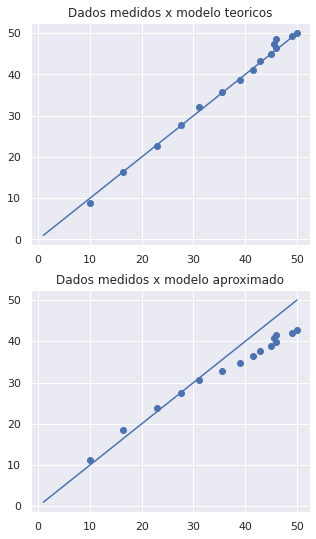

In [34]:
"""
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(x = v_medido, y=v_teorico, mode='markers', name='Terico'), row=1, col=1)
fig.add_trace(go.Scatter(x = [1,50], y= [1,50], mode='lines', name="perfect line"), row=1, col=1)
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
    range = [-1, 50], constrain="domain",
  )

fig.add_trace(go.Scatter(x = v_medido, y=v_modelo, mode='markers', name='Aprox'), row=2, col=1)
fig.add_trace(go.Scatter(x = [1,50], y= [1,50], mode='lines', name="perfect line"), row=2, col=1)
fig.update_xaxes(
    scaleanchor = "y",
    scaleratio = 1,
    range = [-1, 50],
    constrain="domain",
  )
fig.update_layout(height=500, width=500)

"""
plt.figure(figsize=(5,9))
plt.subplot(2,1,1)
plt.scatter(v_medido, v_teorico)
plt.plot([1,50], [1,50])
plt.title('Dados medidos x modelo teoricos')

plt.subplot(2,1,2)
plt.scatter(v_medido, v_modelo)
plt.plot([1,50], [1,50])
plt.title('Dados medidos x modelo aproximado')

plt.show()

Para ter uma ideia quantativa de qual modelo é melhor podemos calcular a soma dos quadradod dos residos para os dois modelos. Quanto menor o modelo é melhor!

In [25]:
S_t_modelo = sum((v_medido - v_modelo)**2)
S_t_teorico = sum((v_medido - v_teorico)**2)

print(f"A soma dos quadrados dos residos entre o modelo teorico e os dados medidos é {S_t_teorico}")
print(f"A soma dos quadrados dos residos entre o modelo empirico e os dados medidos é {S_t_modelo}")


A soma dos quadrados dos residos entre o modelo teorico e os dados medidos é 13.155342122602429
A soma dos quadrados dos residos entre o modelo empirico e os dados medidos é 307.56327317415276


### Linearização de Relações Não-lineares

A regressão linear fornece uma técnica poderosa para ajustar a melhor reta aos dados. Entretanto, ela é baseada no fato de que a relação entre as variáveis dependentes e independentes é linear. Esse não é sempre o caso e o primeiro passo em qualquer análise de regressão deveria ser traçar e inspecionar visualmente os dados para verificar se um modelo linear se aplica. Por exemplo, na figura abaixo podemos ver que traçando uma linha não podemos capturar o comportamento dos dados.

<img src="./images/ajuste_nao_linear.jpg" style="width:250px;height:400px;">

Nestes casos podemos usar a regressão polinomial ou talvez seja possivel com uma transformação podemos expressar os dados na forma linear. 

Vamos ver alguns modelos que usando uma transformação podem ser expressos na forma linear. Um exemplo é o modelo exponencial

$$
y = \alpha_1 e^{\beta_1 x}
$$

onde $\alpha_1$ e $\beta_1$ são constantes. Outro exemplo é 
$$
y= \alpha_2 x^{\beta_2}
$$
onde $\alpha_2$ e $\beta_2$ são constantes. Um terceiro exemplo de um modelo não-linear é a equação da taxa de crescimento da saturação

$$
y = \alpha_3 \frac{x}{\beta_3 + x}
$$

Esses modelos tem bastante aplicação na engenharia. Agora, podemos transformar esses modelos a um modelo linear. Por exemplo para o modelo exponencial temos 

$$
\ln[y = \alpha_1 e^{\beta_1 x}] \rightarrow \ln y = \ln \alpha_1 + \beta_1 x \underbrace{\ln e}_{=1}
$$

Logo, um gráfico de $\ln y$ em função de $\ln x$ irá fornecer uma reta com uma inclinação $\beta_1$ e uma intersecção com o eixo $y$ em $\ln \alpha_1$. 

O segundo exemplo pode ser linearizado tomando-se seu logaritmo na base 10

$$
\log\{y= \alpha_2 x^{\beta_2}\} \rightarrow \log y = \beta_2 \log x + \log{\alpha_2}
$$

Logo, um gráfico de $\log y$ em função de $\log x$ irá fornecer uma reta com uma inclinação
$\beta_2$ e uma intersecção com o eixo $y$ em $\log{\alpha_2}$.

A terceira equação precisa ser invertida para vira linear

$$
(y = \alpha_3 \frac{x}{\beta_3 + x})^{-1} \rightarrow \frac{1}{y} = \frac{\beta_3}{\alpha_3} \frac{1}{x} + \frac{1}{\alpha_3}
$$

Logo, um gráfico de $\frac{1}{y}$ em função de $\frac{1}{x}$ será linear, com uma inclinação $\frac{\beta_3}{\alpha_3}$ e uma interseção com o eixo $y$ em $\frac{1}{\alpha_3}$.

<img src="./images/nlin2lin.jpg" style="width:800px;height:600px;">

Nas suas formas transformadas, esses modelos podem usar a regressão linear para calcular os coeficientes constantes. Eles poderiam, então, ser transformados de volta para seu estado original e usados para propósitos de previsão.

#### **Exemplo:**
Ajuste uma equação de potencia (segundo exemplo) aos dados abaixo

\begin{align*}
x &= [1, 2, 3, 4, 5]\\
y &= [0.5, 1.7, 3.4, 5.7, 8.4]
\end{align*}

**Resolução:**

Primeiro vamos plotar os dados no estado transformado e não transformado

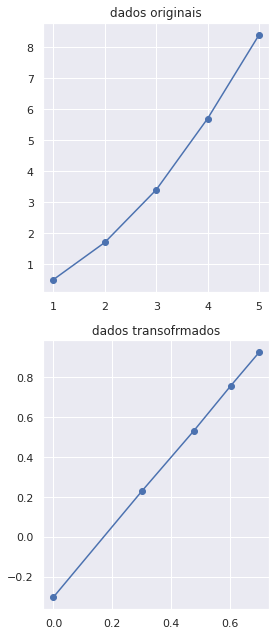

In [37]:
"""
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#fig = make_subplots(rows=2, cols=1)
#fig.add_scatter(x=x, y=y, name='dados originais', row=1, col=1)
#fig = go.Figure()
fig.add_scatter(x=x, y=y)
fig.update_xaxes(
    scaleanchor = "y",
    range = [0, 8],constrain="domain",
    title = 'dados originais'
    )

fig.show()

fig = go.Figure()
fig.add_scatter(x=np.log10(x), 
                y=np.log10(y))
fig.update_xaxes(
    scaleanchor = "y",
    range = [-0.1, 1],constrain="domain",
    title="dados transofrmados"
    )
fig.show()
"""
x = [1, 2, 3, 4, 5]
y = [0.5, 1.7, 3.4, 5.7, 8.4]

plt.figure(figsize=(4, 9))

plt.subplot(2,1,1)
plt.scatter(x, y)
plt.plot(x, y)
plt.title('dados originais')

plt.subplot(2,1,2)
plt.scatter(np.log10(x), np.log10(y))
plt.plot(np.log10(x), np.log10(y))
plt.title("dados transofrmados")

plt.tight_layout()
plt.show()


Podemos usar a nossa função `linear_regression` e os dados transformados para achar os coeficientes de inclinação e interseção

In [27]:
inter, incli = linear_regression(np.log10(x), np.log10(y))

print(f"interseção: {inter}, \ninclinação: {incli}")

interseção: -0.300219794569931, 
inclinação: 1.75172364807736


Aí, calculando a inversa da transformação podemos achar $\alpha$ e $\beta$

In [28]:
alpha = 10**inter
beta = incli

print(f"alpha: {alpha}, \nbeta: {beta}")

alpha: 0.500933649097749, 
beta: 1.75172364807736


Então a equação de potencia ajustado é 

$$
y = 0.5 x^{1.75}
$$

## Regressão Polinomial

Em muitos casos na engenharia, os dados não podem ser respresentados por uma reta. Um caminho é usando uma transformação mudamos os dados de tal forma que seguem uma reta. Uma alternativa é ajustar polinômios aos dados usando *regressão polinomial*.

O procedimento dos mínimos quadrados pode ser prontamente estendido para ajustar dados por um polinômio de grau mais alto. Por exemplo, suponha que se queira ajustar um polinômio de segundo grau ou quadrático:

$$
y = a_0 + a_1 x + a_2 x^2 + e
$$

Nesse caso, a soma dos quadrados dos resíduos é

$$
S_r = \sum_{i=1}^n (y_i - a_0 - a_1 x_i - a_2 x_i^2)^2
$$

Seguindo o procedimento da seção anterior, toma-se a derivada da equação acima com relação a cada um dos coeficientes desconhecidos do polinômio, como em

\begin{align*}
\frac{\partial S_r}{\partial a_0} &= -2 \sum(y_i - a_0 - a_1 x_i - a_2 x_i^2)\\
\frac{\partial S_r}{\partial a_1} &= -2 \sum x_i(y_i - a_0 - a_1 x_i - a_2 x_i^2)\\
\frac{\partial S_r}{\partial a_2} &= -2 \sum x_i^2(y_i - a_0 - a_1 x_i - a_2 x_i^2)
\end{align*}

Essas equações podem ser igualadas a zero e reorganizadas para determinar o seguinte
conjunto de equações normais:

\begin{align*}
(n)a_0 + (\sum(x_i))a_1 + (\sum x_i^2)a_2 &= \sum y_i \\
(\sum x_i)a_0 + (\sum(x_i^2))a_1 + (\sum x_i^3)a_2 &= \sum x_i y_i \\
(\sum x_i^2)a_0 + (\sum(x_i^3))a_1 + (\sum x_i^4)a_2 &= \sum x_i^2 y_i
\end{align*}

Nesse caso, vê-se que o problema de determinar o polinômio de segundo grau por
mínimos quadrados é equivalente a resolver um sistema de três equações lineares simultâneas. Neste sistema a matrix $[A]$ é

$$
A = \begin{bmatrix}
n & \sum x_i & \sum x_i^2\\
\sum x_i & \sum x_i^2 & \sum x_i^3\\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4
\end{bmatrix}
$$

e o vetor $\{b\}$ é 

$$
\begin{bmatrix}
\sum y_i\\
\sum x_i y_i \\
\sum x_i^2 y_i
\end{bmatrix}
$$

O caso bidimensional pode ser facilmente estendido para um polinômio de grau $m$ como

$$
y = a_0 + a_1 x + a_2 x^2 +... + a_m x^m+ e
$$

A análise anterior pode ser facilmente estendida para esse caso mais geral. Portanto,
pode-se perceber que determinar os coeficientes de um polinômio de grau $m$ é equivalente
a resolver um sistema de $m + 1$ equações lineares simultâneas. Nesse caso, o erro padrão
é formulado como

$$
s_{y/x} = \sqrt{\frac{S_r}{n - (m+1)}}
$$

### **Exemplo:**
Ajuste um polinômio do segundo grau aos dados abaixo

\begin{align*}
x &= [0, 1, 2, 3, 4, 5]\\
y &= [2.1, 7.7, 13.6, 27.2, 40.9, 61.1]
\end{align*}


**Resolução:**

Vamos resolver isso usando o Python 

In [38]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])

m = 2
n = len(x)

#calculando os elementos do vetor b
b1 = y.sum()
b2 = sum(x*y)
b3 = sum(x**2 * y)

#calculando os elementos da matriz A
a11 = n
a12 = sum(x)
a13 = sum(x**2)

a21 = sum(x)
a22 = sum(x**2)
a23 = sum(x**3)

a31 = sum(x**2)
a32 = sum(x**3)
a33 = sum(x**4)

bb = np.array([b1, b2, b3])
AA = np.array([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])

In [39]:
import cn_utils as cn

a0, a1, a2 = cn.gauss_elimination_minimal(AA, bb)

a0, a1, a2

(2.47857142857143, 2.359285714285706, 1.8607142857142878)

Então a equação ajustada é 

$$
y = 2.478 + 2.359 x + 1.86307 x^2
$$

In [40]:
 f = lambda x: a0 + a1 * x + a2 * x**2

Tendo o modelo podemos calcular o erro padrão da estimativa



In [32]:
S_r = sum((y - f(x))**2)

s_y_x = np.sqrt(S_r/(n-3))

print(f"s_y/x é {s_y_x}")

s_y/x é 1.1175227706213167


E o coeficiente de determinação $(r^2)$ é 

In [33]:
S_t = sum((y - y.mean())**2)

r_2 = (S_t - S_r)/S_t
r_2

0.9985093572984048

Os resultados indicam que 99,851% da incerteza original foi explicada por esse
modelo. Esse resultado confirma a conclusão de que a equação quadrática representa um
excelente ajuste, como também é evidente a partir do plot abaixo

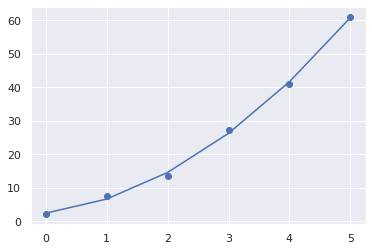

In [41]:
#fig = go.Figure()

#fig.add_scatter(x=x, y=y, mode='markers', name='dados medidos')
#fig.add_scatter(x=x, y=f(x), mode='lines', name='modelo ajustado')

plt.scatter(x,y, label= 'dados medidos')
plt.plot(x, f(x), label='modelo ajustado')

## EXERCICIO: Implementar o algortimo para regressão polinomial para um caso geral no Python

## Regressão Linear Multipla

Uma extensão útil da regressão linear é o caso no qual $y$ é uma função linear de duas ou
mais variáveis independentes. Por exemplo, $y$ poderia ser uma função linear de $x_1$ e $x_2$,
como em

$$
y = a_0 + a_1 x_1 + a_2 x_2 + e
$$

Tal equação é particularmente útil para ajustar dados experimentais, para os quais as
variáveis sendo estudadas são freqüentemente uma função de duas outras variáveis.
Para esse caso bidimensional, a "reta" de regressão se torna o "plano" de regressão.

<img src="./images/reg_mul.jpg" style="width:450px;height:600px;">


Como nos casos anteriores, os "melhores" valores dos coeficientes são determinados
escrevendo-se a soma dos quadrados dos resíduos

$$
S_r = \sum_{i=1}^n (y_i - a_0 - a_1 x_{1i} - a_2 x_{2i})^2
$$

e derivando-a com relação a cada um dos coeficientes desconhecidos,

\begin{align*}
\frac{\partial S_r}{\partial a_0} &= -2 \sum(y_i - a_0 - a_1 x_{1i} - a_2 x_{2i})\\
\frac{\partial S_r}{\partial a_1} &= -2 \sum x_{1i}(y_i - a_0 - a_1 x_{1i} - a_2 x_{2i})\\
\frac{\partial S_r}{\partial a_2} &= -2 \sum x_{2i}(y_i - a_0 - a_1 x_{1i} - a_2 x_{2i})
\end{align*}

Os coeficientes fornecendo a soma mínima dos quadrados dos resíduos são obtidos
igualando-se as derivadas parciais a zero e expressando o resultado na forma matricial como

$$
\begin{bmatrix}
n & \sum x_{1i} & \sum x_{2i}\\
\sum x_{1i} & \sum x_{2i}^2 & \sum x_{1i} x_{2i}\\
\sum x_{2i} & \sum x_{1i} x_{2i} & \sum x_{2i}^2
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 
\end{bmatrix}
 = 
\begin{bmatrix}
\sum y_{i} \\
\sum x_{1i} y_i \\
\sum x_{2i} y_i 
\end{bmatrix}
$$ 

### **Exemplo:**
Use regressão linear multipla para ajustar os dados

| $x_1$  | $x_2$  | $y$  |   
|--------|--------|------|
| 0      | 0      | 5    |  
| 2      | 1      | 10   | 
| 2.5    | 2      | 9    |
| 1      | 3      | 0    |
| 4      | 6      | 3    |
| 7      | 2      | 27   |    

**Resolução:**




In [35]:
x1 = np.array([0, 2, 2.5, 1, 4, 7])
x2 = np.array([0, 1, 2, 3, 6, 2])
y = np.array([5, 10, 9, 0, 3, 27])

fig = go.Figure()
fig.add_scatter3d(x=x1, y=x2, z=y, mode='markers')

In [36]:
n = len(x1)
a11 = n
a12 = sum(x1)
a13 = sum(x2)

a21 = a12
a22 = sum(x1**2)
a23 = sum(x1*x2)

a31 = a13
a32 = a23
a33 = sum(x2**2)

b1 = sum(y)
b2 = sum(x1*y)
b3 = sum(x2*y)

bb = np.array([b1, b2, b3])
AA = np.array([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])

cn.gauss_elimination_minimal(AA, bb)

array([ 5.,  4., -3.])

Então o modelo é 

$$
y = 5 + 4x_1 -3x_2
$$

## EXERCICIO: Implementar o algoritmo de regressão multipla para um caso geral no Python

## Minimos Quadrados Linear Geral

Até agora foram introduzidos três tipos de regressão: linear simples, polinomial e linear múltipla. Na realidade, todas as três pertencem ao seguinte modelo geral de mínimos quadrados linear:

$$
y = a_0 z_0 + a_1 z_1 + a_2 z_2 + ... + a_m z_m + e
$$

onde $z_0, z_1, ..., z_m$ são $m+1$ funções base. Pode ser visto facilmente como a regressão
linear simples e a linear múltipla se encaixam nesse modelo — isto é, $z_0 = 1, z_1 = x_1,
z_2 = x_2 , ..., z_m = x_m$ . Além disso, a regressão polinomial também é incluída se as funções base forem monômios simples como em $z_0 = x^0 = 1, z_1 = x, z_2 = x^2 , ..., z_m = x^m$.

Observe que a terminologia "linear" se refere apenas a como o modelo depende de seus parâmetros — ou seja, os $a$’s. Como no caso da regressão polinomial, as próprias
funções podem ser altamente não-lineares. Por exemplo, os $z$’s podem ser funções senoidais, como em

$$
y = a_0 + a_1 \cos(\omega t) + a_2 \sin(\omega t)
$$

Tal forma é a base da análise de Fourier. Por outro lado, um modelo aparentemente simples como

$$
f(x) = a_0(1-e^{-a_1 x})
$$

é verdadeiramente não-linear porque não pode ser manipulado na forma da equação geral.

Por agora, a equação geral pode ser expressa na notação matricial como

$$
\{Y\} = [Z] \{A\} + \{E\}
$$

onde $[Z]$ é a matriz dos valores calculados das funções base nos valores medidos das variáveis independentes,

$$
[Z] = \begin{bmatrix}
z_{01} & z_{11} &... &z_{m1}\\
z_{02} & z_{12} & ...&z_{m2}\\
. & . & .& \\
. & .& .& \\
. & .& .& \\
z_{0n} & z_{1n} &... &z_{mn} 
\end{bmatrix}
$$

onde $m$ é o número de variáveis no modelo e $n$ é o número de pontos dados. Como $n \geq m + 1$, você deve perceber que, na maioria das vezes, $[Z]$ não é uma matriz quadrada.

O vetor coluna $\{Y\}$ contém os valores observados das variáveis dependentes

$$
\{Y\}^T = [y_1 \, y_2 \,...\, y_n]
$$

O vetor coluna $\{A\}$ contém os coeficientes desconhecidos

$$
\{A\}^T = [a_1 \, a_2 \,...\, a_m]
$$

e o vetor coluna $\{E\}$ contém os resíduos

$$
\{E\}^T = [e_1 \, e_2 \,...\, e_n]
$$

Como foi feito por todo este capítulo, a soma dos quadrados dos resíduos para esse
caso pode ser definida por

$$
S_r = \sum^{n}_{i=1}\big(y_i - \sum_{j=0}^m a_j z_{ji}\big)^2
$$

Essa quantidade pode ser minimizada tomando-se suas derivadas parciais em relação a cada um dos coeficientes e igualando-se a equação resultante a zero. O resultado desse processo são as equações normais que podem ser expressas concisamente na forma matricial como

$$
\big[[Z]^T [Z]\big] \{A\} = \{[Z]^T \{Y\} \}
$$

Pode ser mostrado que, de fato, essa equação é equivalente às equações normais desenvolvidas anteriormente para a regressão linear simples, polinomial e linear múltipla.

## Regressão Não-Linear

Há muitos casos em engenharia nos quais modelos não-lineares devem ser ajustados aos
dados. No presente contexto, esses modelos são definidos como aqueles que têm uma dependência não-linear com seus parâmetros. Por exemplo,

$$
f(x) = a_0 (1 - e^{-a_1 x}) + e
$$

Como nos casos dos mínimos quadrados linear, a regressão não-linear é baseada
na determinação dos valores dos parâmetros que minimizem a soma dos quadrados
dos resíduos. Entretanto, para o caso não-linear, a solução deve prosseguir de uma
forma iterativa.

O método de Gauss-Newton é um algoritmo para minimizar a soma dos quadrados
dos resíduos entre os dados e as equações não-lineares. Os conceito chave subjacente a
essa técnica é que uma expansão em série de Taylor é usada para expressar a equação não-
linear original em uma forma aproximada linear. A seguir, a teoria dos mínimos quadrados pode ser usada para se obter novas estimativas dos parâmetros que se movam na direção de minimizar o resíduo.

Para ilustrar como isso é feito, primeiro a relação entre a equação não-linear e os
dados pode ser expressa genericamente como

$$
y_i = f(x_i, a_0, a_1, ...,a_m) + e_i \rightarrow y_i = f(x_i) + e
$$

onde $y_i$ é um valor medido da variável dependente, $f (x_i ; a_0 , a_1 , ..., a_m )$ é a equação que é uma função da variável independente $x_i$ e uma função não-linear dos parâmetros $a_0 , a_1 , ..., a_m$ e $e_i$ é um erro aleatório.

O modelo não-linear pode ser expandido por uma série de Taylor em torno dos valores dos parâmetros e truncada depois da primeira derivada. Por exemplo, para um caso
com $2$ parâmetros,

$$
f(x_i)_{j+1} = f(x_i)_j + \frac{\partial f(x_i)_j}{\partial a_0} \Delta a_0  + \frac{\partial f(x_i)_j}{\partial a_1}\Delta a_1
$$

onde $j$ é a aproximação inicial, $j + 1$ é a previsão, $\Delta a_0 = a_{0,j+1} − a_{0,j}$ e $\Delta a_1 = a_{1,j+1} − a_{1,j}$ . Logo, linearizamos o modelo inicial com relação aos parâmetros.  Substituindo essa expansão na equação geral temos

$$
y_i - f(x_i)_j = + \frac{\partial f(x_i)_j}{\partial a_0} \Delta a_0  + \frac{\partial f(x_i)_j}{\partial a_1} \Delta a_1 + e_i
$$


ou, na forma matricial

$$
\{D\} = [Z_j]{\Delta A} + \{E\}
$$

onde $[Z_j]$ é a matriz das derivadas parciais da função calculada na aproximação inicial $j$,

$$
[Z_j] = \begin{bmatrix}
\frac{\partial f_1}{\partial a_0} & \frac{\partial f_1}{\partial a_1}\\
\frac{\partial f_2}{\partial a_0} & \frac{\partial f_2}{\partial a_1} \\
. & . \\
. & . \\
\frac{\partial f_n}{\partial a_0} & \frac{\partial f_n}{\partial a_1} 
\end{bmatrix}
$$

onde $n$ é o número de pontos dados e $\frac{\partial f_i}{\partial a_k}$ é a derivada parcial da função com relação ao $k$-ésimo parâmetro calculada no $i$-ésimo ponto dado. O vetor $\{D\}$ contém as diferenças entre as medidas e os valores da função,

$$
\{D\} = \begin{bmatrix}
y_1 - f(x_1)\\
y_2 - f(x_2)\\
. \\
. \\
. \\
y_n - f(x_n) 
\end{bmatrix}
$$

e o vetor $\{\Delta A\}$ contém a variação nos valores dos parâmetros,

$$
\{\Delta A\} = \begin{bmatrix}
\Delta a_0\\
\Delta a_1\\
. \\
. \\
. \\
\Delta a_m 
\end{bmatrix}
$$

A aplicação da teoria linear dos mínimos quadrados a equação matricial acima resulta nas
seguintes equações normais

$$
\big[[Z_j]^T [Z_j]\big] \{\Delta A\} = \{[Z_j]^T \{D\} \}
$$

Logo, a abordagem consiste em resolver essa equação, determinando $\{\Delta A\}$, o qual
pode ser usado para calcular valores melhorados para os parâmetros como em

$$
a_{0, j+1} = a_{0, j} + \Delta a_0 
$$
e
$$
a_{1, j+1} = a_{1, j} + \Delta a_1 
$$

Esse procedimento é repetido até que a solução convirja — ou seja, até que

$$
|\varepsilon_a|_k = |\frac{a_{k, j+1} - a_{k,j}}{a_{k, j+1}}| 100\%
$$

fique abaixo de um critério de parada aceitável.

#### Exemplo:

Ajuste a função $f(x; a_0, a_1) = a_0(1-e^{-a_1 x})$ aos dados

\begin{align*}
x &= [0.25, 0.75, 1.25, 1.75, 2.25]\\
y &= [0.28, 0.57, 0.68, 0.74, 0.79]
\end{align*}

Use aproximações iniciais de $a_0 = 1.0 \text { e } a_1 = 1.0$ para os parâmetros. Observe que, para
essas aproximações, a soma inicial dos quadrados dos resíduos é $0.0248$.

**Resolução:**

Primeiro vamos plotar os dados

In [37]:
x = np.array([0.25, 0.75, 1.25, 1.75, 2.25])
y = np.array([0.28, 0.57, 0.68, 0.74, 0.79])

fig = go.Figure()

fig.add_scatter(x=x, y=y, mode='markers')
fig.update_xaxes(
    scaleanchor = "y",
    range = [0, 3],constrain="domain",
    )

Vamos resolver esse exemplo usando a matriz inversa. Ou seja 

$$
\big[[Z_j]^T [Z_j]\big] \{\Delta A\} = \{[Z_j]^T \{D\} \} \rightarrow \{\Delta A\} = \big[[Z_j]^T [Z_j]\big]^{-1}  \{[Z_j]^T \{D\} \}
$$

Agora vamos ajustar o modelo

$\frac{\partial f}{\partial a_0} = 1-e^{-a_1 x}$ 

e 

$\frac{\partial f}{\partial a_1} = a_0 x e^{-a_1 x}$

In [38]:
a0 = 1.
a1 = 1.

f = lambda x: a0*(1 - np.exp(-a1*x))
f0 = lambda x: 1 - np.exp(-a1 * x)
f1 = lambda x: a0 * x * np.exp(-a1 * x)

z0 = np.array([[f0(item), f1(item)] for item in x])

display(z0)

array([[0.22119922, 0.1947002 ],
       [0.52763345, 0.35427491],
       [0.7134952 , 0.358131  ],
       [0.82622606, 0.3041044 ],
       [0.89460078, 0.23714826]])

Multiplicando a matriz `z0` pela sua transposta resulta em

In [39]:
z_inv = np.linalg.inv((z0.T).dot(z0))

A matriz D é calculada na seguinte forma

In [40]:
D = y - f(x)
D

array([ 0.05880078,  0.04236655, -0.0334952 , -0.08622606, -0.10460078])

Agora construimos $[Z_0]^T \{D\}$

In [41]:
zD = (z0.T).dot(D)

zD

array([-0.15335612, -0.03656535])

Então o vetor $\{\Delta A\}$ é 

In [42]:
A0 = z_inv.dot(zD)
A0

array([-0.27147736,  0.50193087])

Esses valores são correçoes da primeira iteração e devem ser somados aos valores inciais de `a0` e `a1` 

In [43]:
a0 += A0[0]
a1 += A0[1]

a0, a1

(0.7285226400154179, 1.5019308677020646)

Logo, as estimativas melhoradas dos parâmetros são $a_0 = 0.7286$ e $a_1 = 1.5019$. Os
novos parâmetros resultam em uma soma dos quadrados dos resíduos igual a $0.0242$. Calculando os erros  resultam em $\varepsilon_0$ e $\varepsilon_1$ iguais a $37\%$ e $33\%$, respectivamente. O cálculo seria então repetido até que esses valores ficassem abaixo do critério de parada prescrito. O resultado final é $a_0 = 0.79186$ e $a_1 = 1.6751$. Esses coeficientes dão uma soma dos quadrados dos resíduos de $0.000662$.